In [59]:
# importing the dependencies 
import numpy as np 
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import f1_score, accuracy_score, classification_report, confusion_matrix, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# data collection & processing
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
data = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [4]:
data.head(10)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0.07864         0.08690              0.07017         0.1812   
2           0.15990         0.19740              0.12790         0.2069   
3           0.28390         0.24140              0.10520         0.2597   
4           0.13280         0.19800              0.10430         0.1809   
5           0.17000         0.15780              0.08089         0.2087   
6           0.10900         0.11270              0.07400         0.1794   
7           0.16450         0.09366              0.05985         0.2196   
8           0.19320         0.18590              0.09353         0.2350   
9           0.23960         0.22730              0.08543         0.2030   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   
5                 0.07613  ...         15.47          23.75           103.40   
6                 0.05742  ...         22.88          27.66           153.20   
7                 0.07451  ...         17.06          28.14           110.60   
8                 0.07389  ...         15.49          30.73           106.20   
9                 0.08243  ...         15.09          40.68            97.65   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   
5       741.6            0.1791             0.5249           0.5355   
6      1606.0            0.1442             0.2576           0.3784   
7       897.0            0.1654             0.3682           0.2678   
8       739.3            0.1703             0.5401           0.5390   
9       711.4            0.1853             1.0580           1.1050   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  
5                0.1741          0.3985                  0.12440  
6                0.1932          0.3063                  0.08368  
7                0.1556          0.3196                  0.11510  
8                0.2060          0.4378                  0.10720  
9      

In [5]:
data['label'] =breast_cancer.target

In [6]:
data.tail(2)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
567           0.27700          0.3514                0.152         0.2397   
568           0.04362          0.0000                0.000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  label  
567                 0.265          0.4087                  0.12400      0  
568                 0.000          0.2871                  0.07039      1  

[2 rows x 31 columns]

In [7]:
data.shape

(569, 31)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [10]:
data.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension       label  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [11]:
data['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [12]:
data.groupby('label').mean()

mean radius  mean texture  mean perimeter   mean area  mean smoothness  \
label                                                                           
0        17.462830     21.604906      115.365377  978.376415         0.102898   
1        12.146524     17.914762       78.075406  462.790196         0.092478   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
label                                                                         
0              0.145188        0.160775             0.087990       0.192909   
1              0.080085        0.046058             0.025717       0.174186   

       mean fractal dimension  ...  worst radius  worst texture  \
label                          ...                                
0                    0.062680  ...     21.134811      29.318208   
1                    0.062867  ...     13.379801      23.515070   

       worst perimeter   worst area  worst smoothness  worst compactness  \
label                                                                      
0           141.370330  1422.286321          0.144845           0.374824   
1            87.005938   558.899440          0.124959           0.182673   

       worst concavity  worst concave points  worst symmetry  \
label                                                          
0             0.450606              0.182237        0.323468   
1             0.166238              0.074444        0.270246   

       worst fractal dimension  
label                           
0                     0.091530  
1                     0.079442  

[2 rows x 30 columns]

<Axes: ylabel='label'>

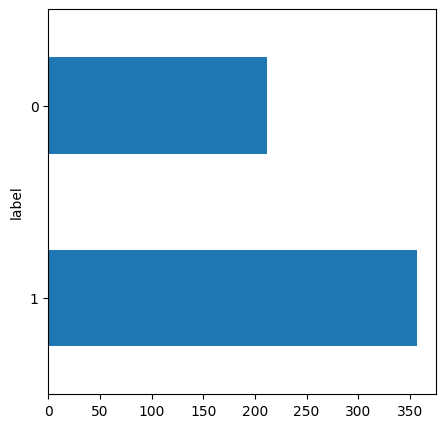

In [13]:
data['label'].value_counts().plot(kind = 'barh',  figsize = [5,5], )

In [73]:
# # Correlation heatmap of features
# plt.figure(figsize=(20,15))
# correlation = data.corr()
# sns.heatmap(correlation, annot=True, fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()
correlation = data.corr()['label']
correlation

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

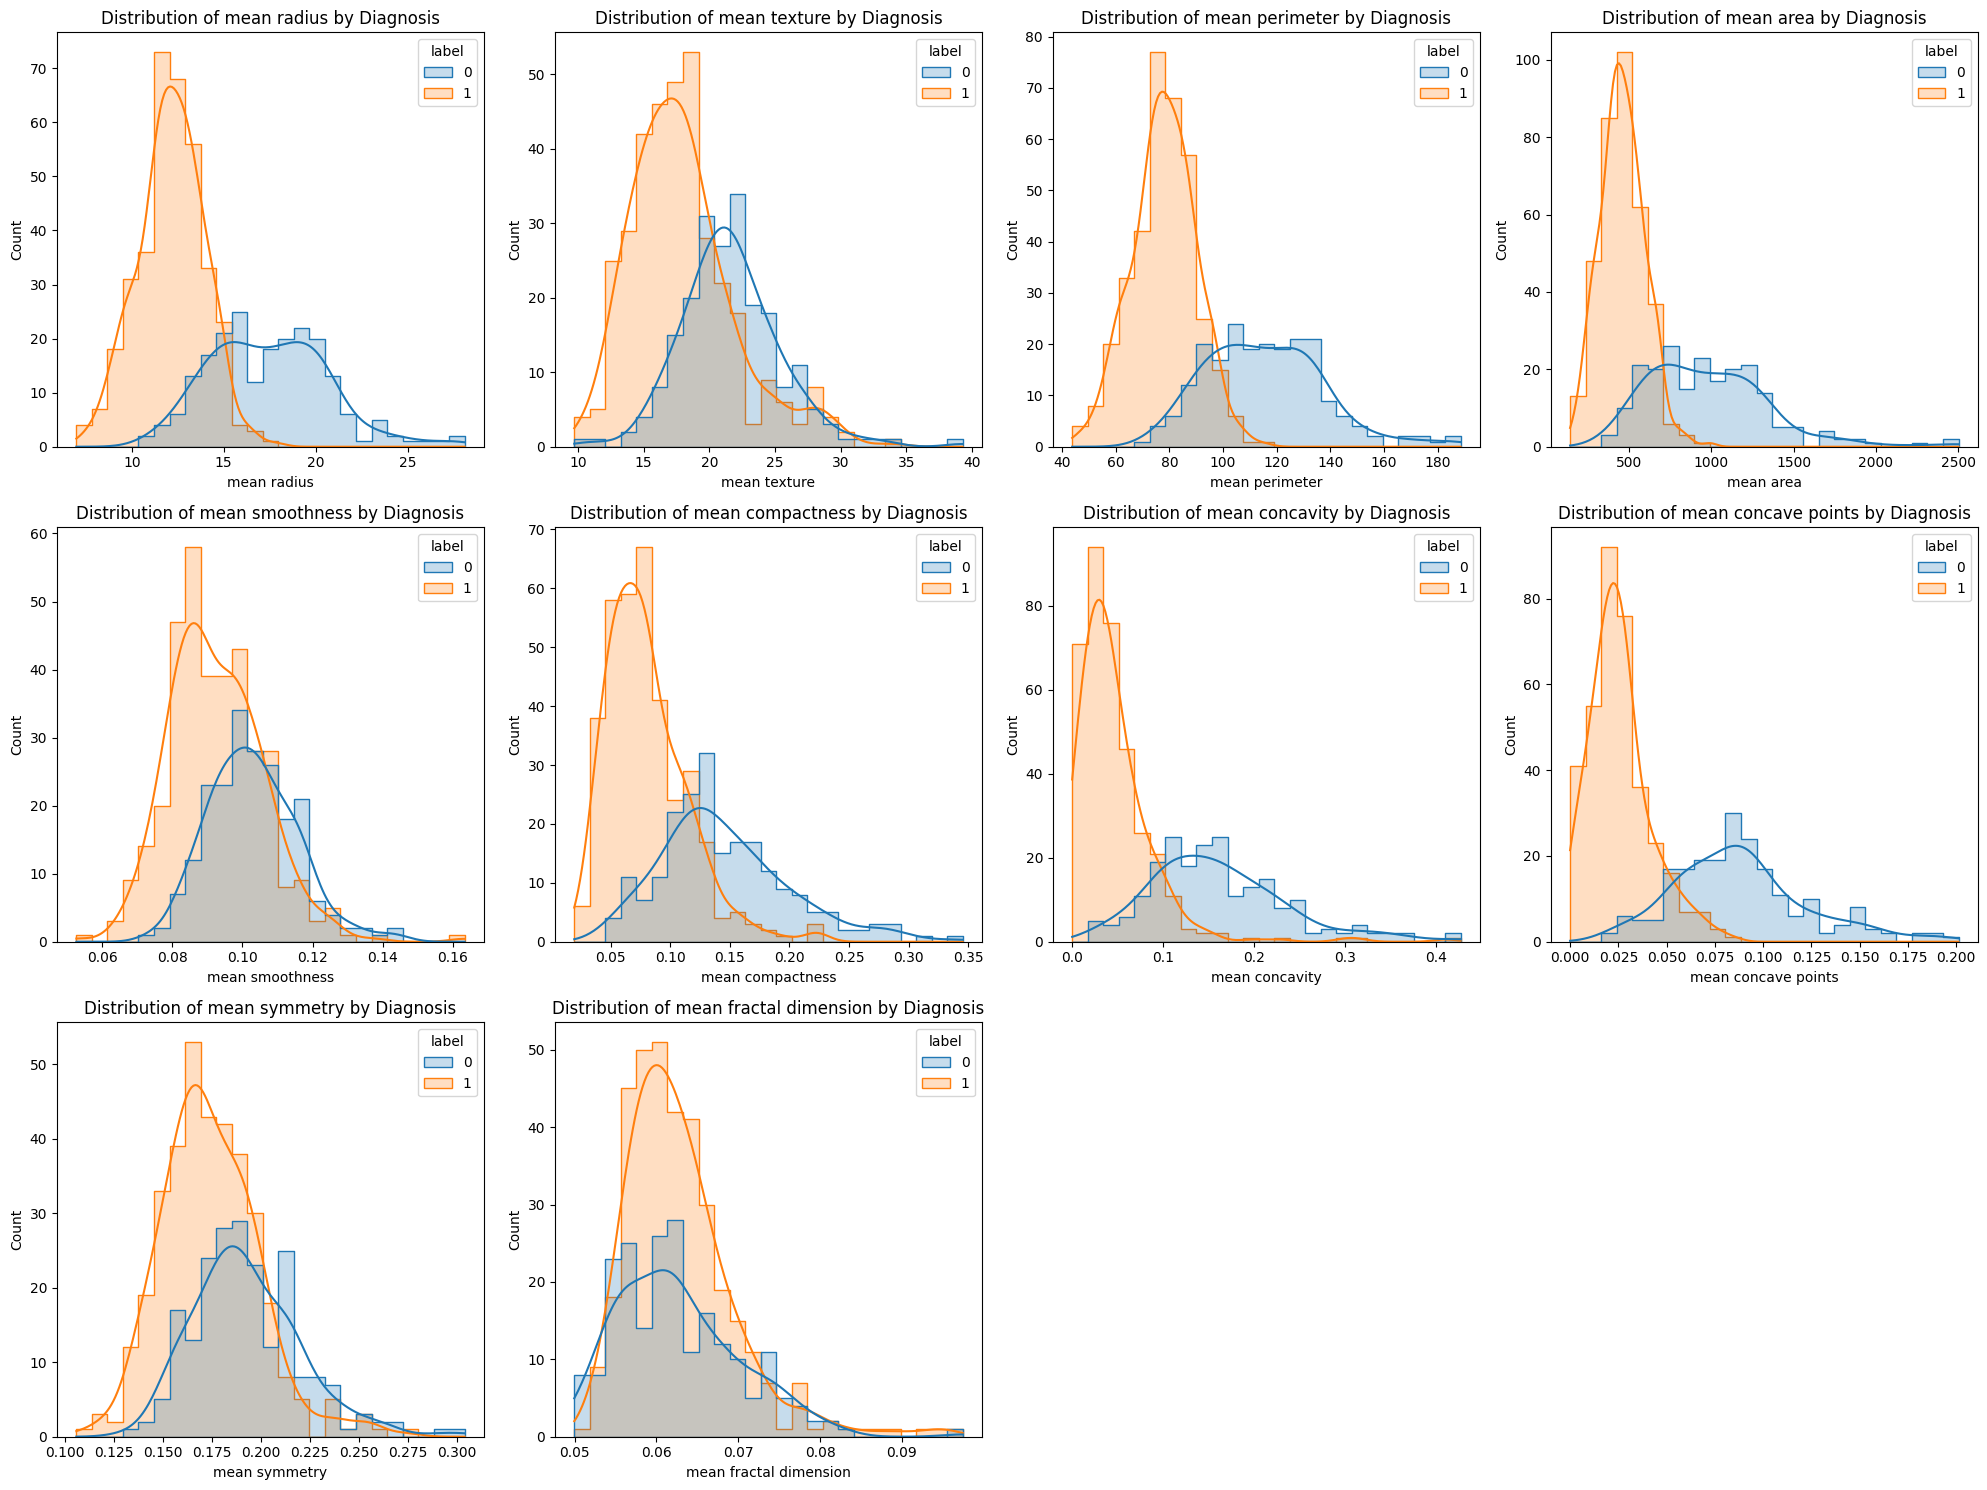

In [14]:
# Distribution Plots for MEAN RADIUS by Diagnosis
mean_columns = data.columns[0:10]  # Selecting columns related to mean features
plt.figure(figsize=(20,15))

for i, column in enumerate(mean_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=data, x=column, hue='label', kde=True, element="step", bins=25)
    plt.title(f'Distribution of {column} by Diagnosis')

plt.tight_layout()
plt.show()

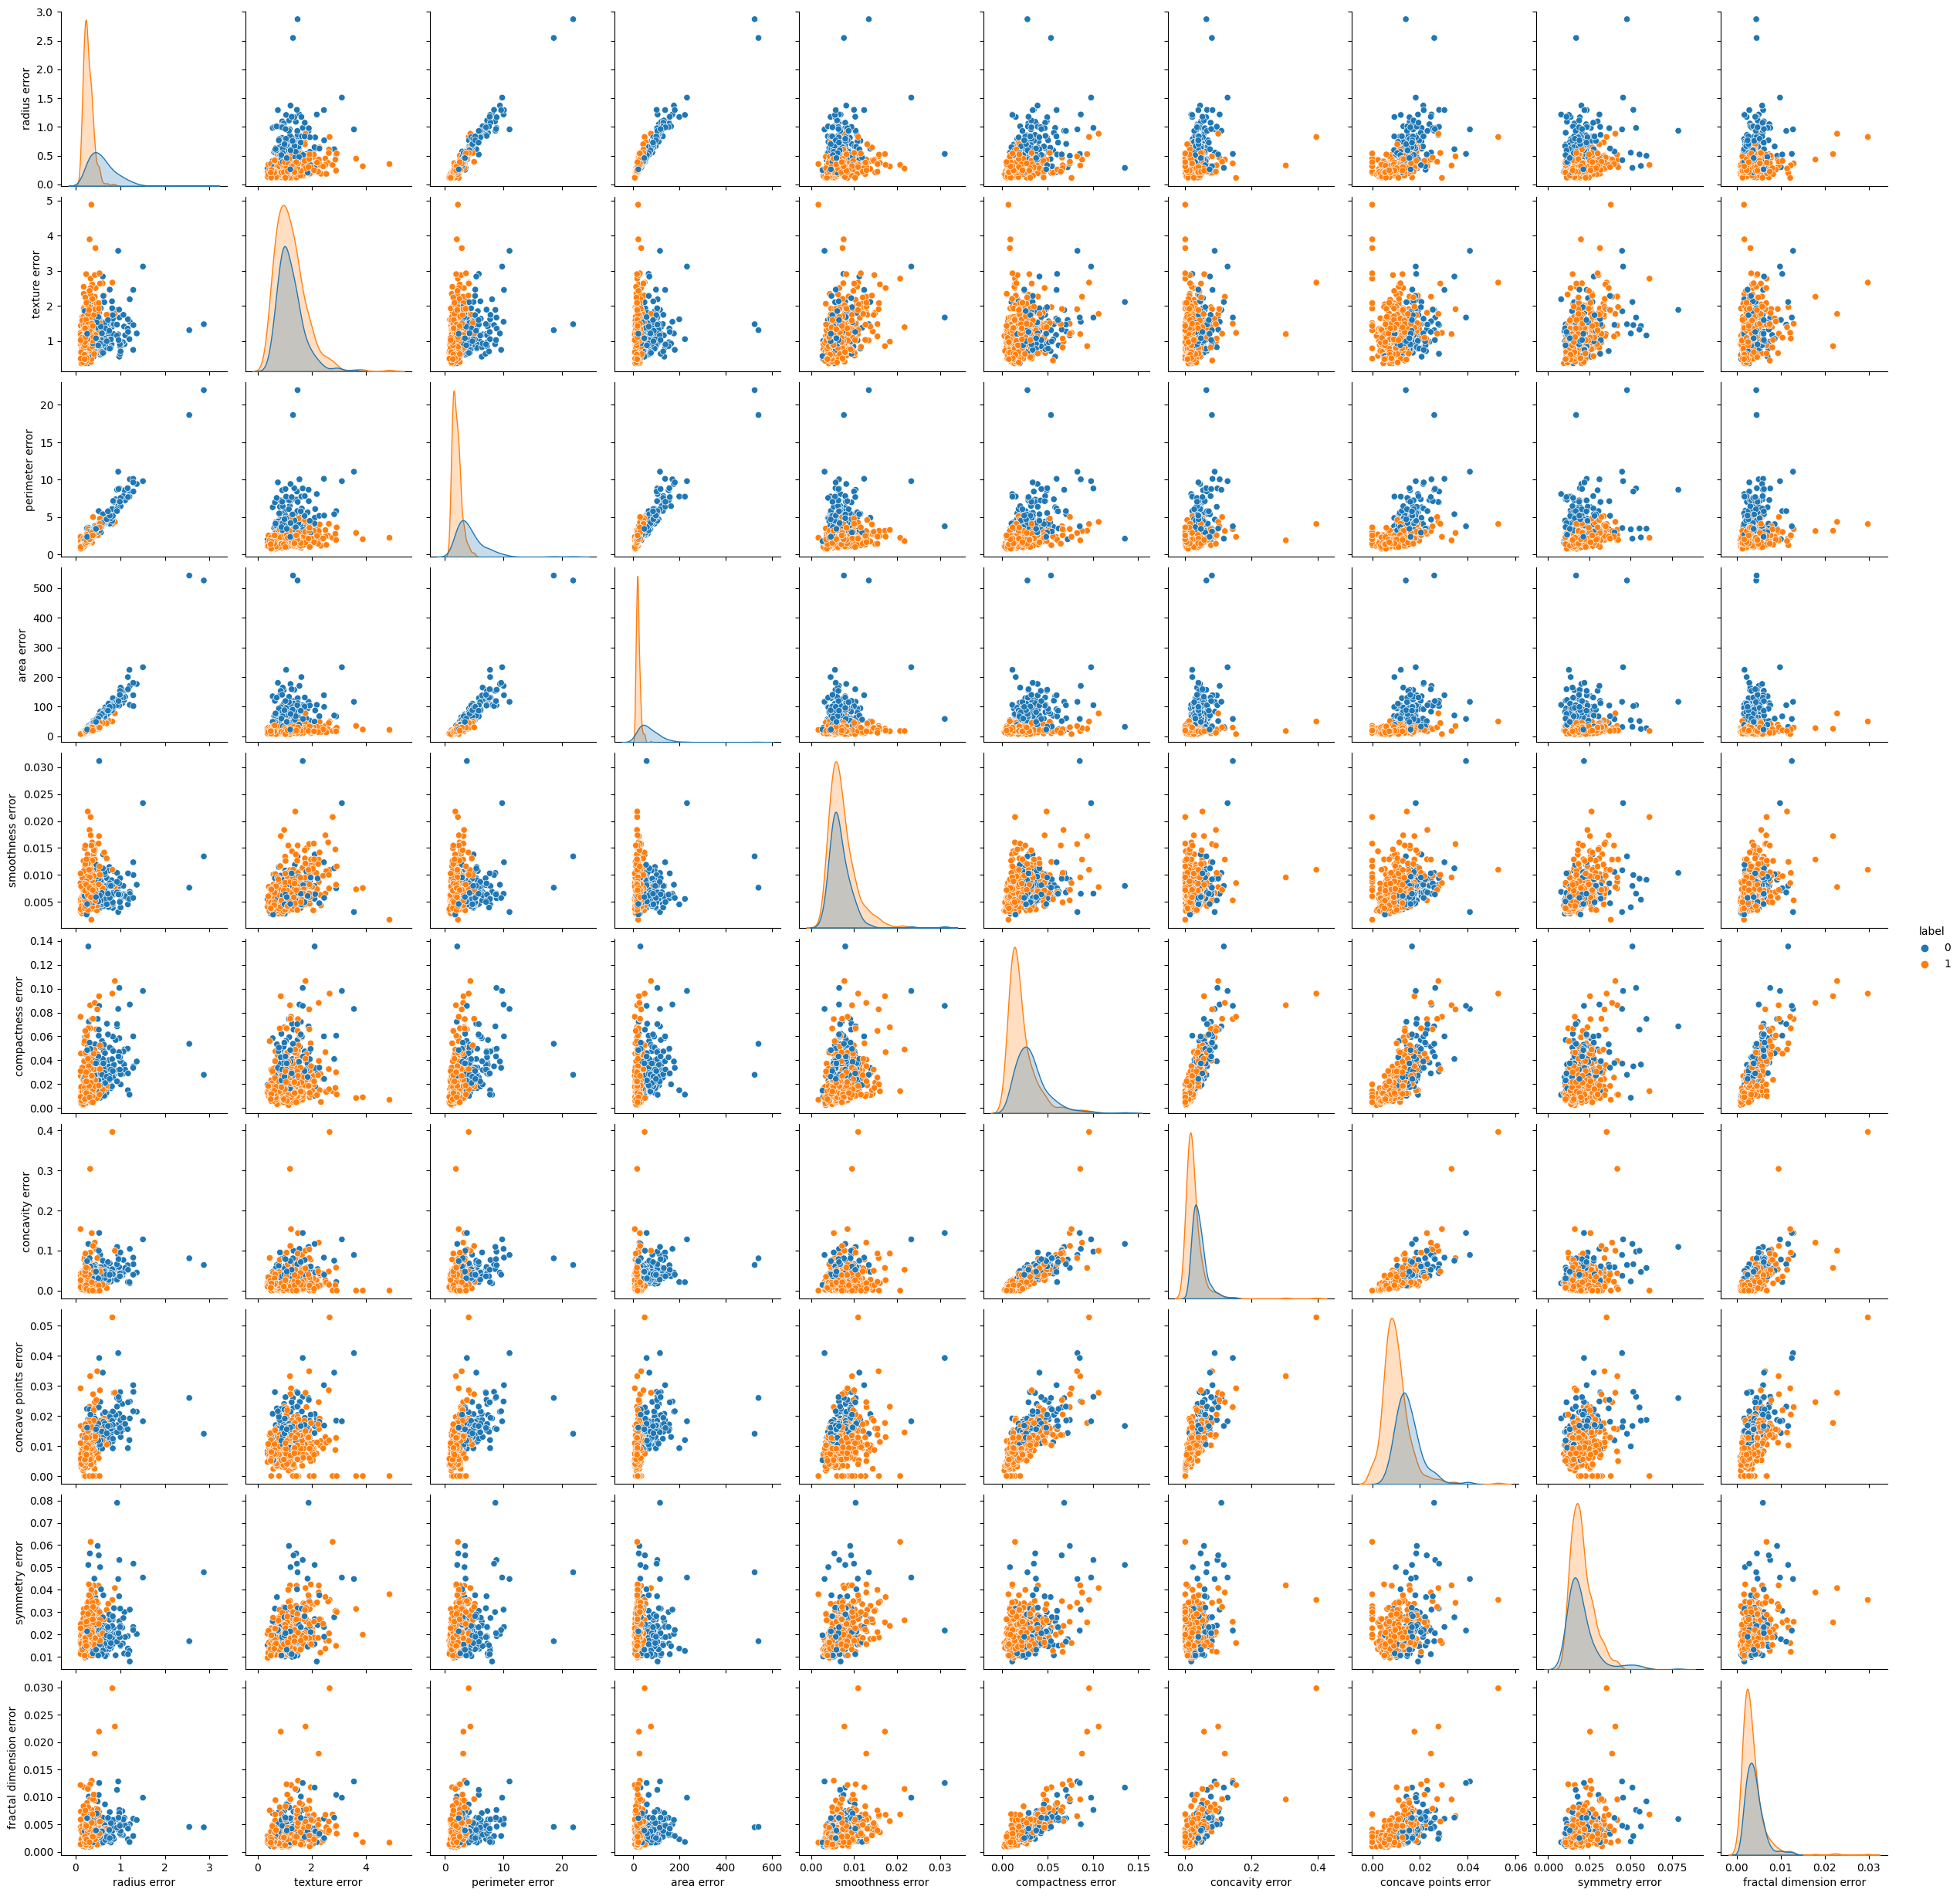

In [15]:

# Creating a pairplot for "RADIUS ERROR" features
sns.pairplot(data, hue='label', vars=[
"radius error",
"texture error",            
"perimeter error",           
"area error",                
"smoothness error",         
"compactness error",     
"concavity error",           
"concave points error",      
"symmetry error",           
"fractal dimension error"])
plt.show()

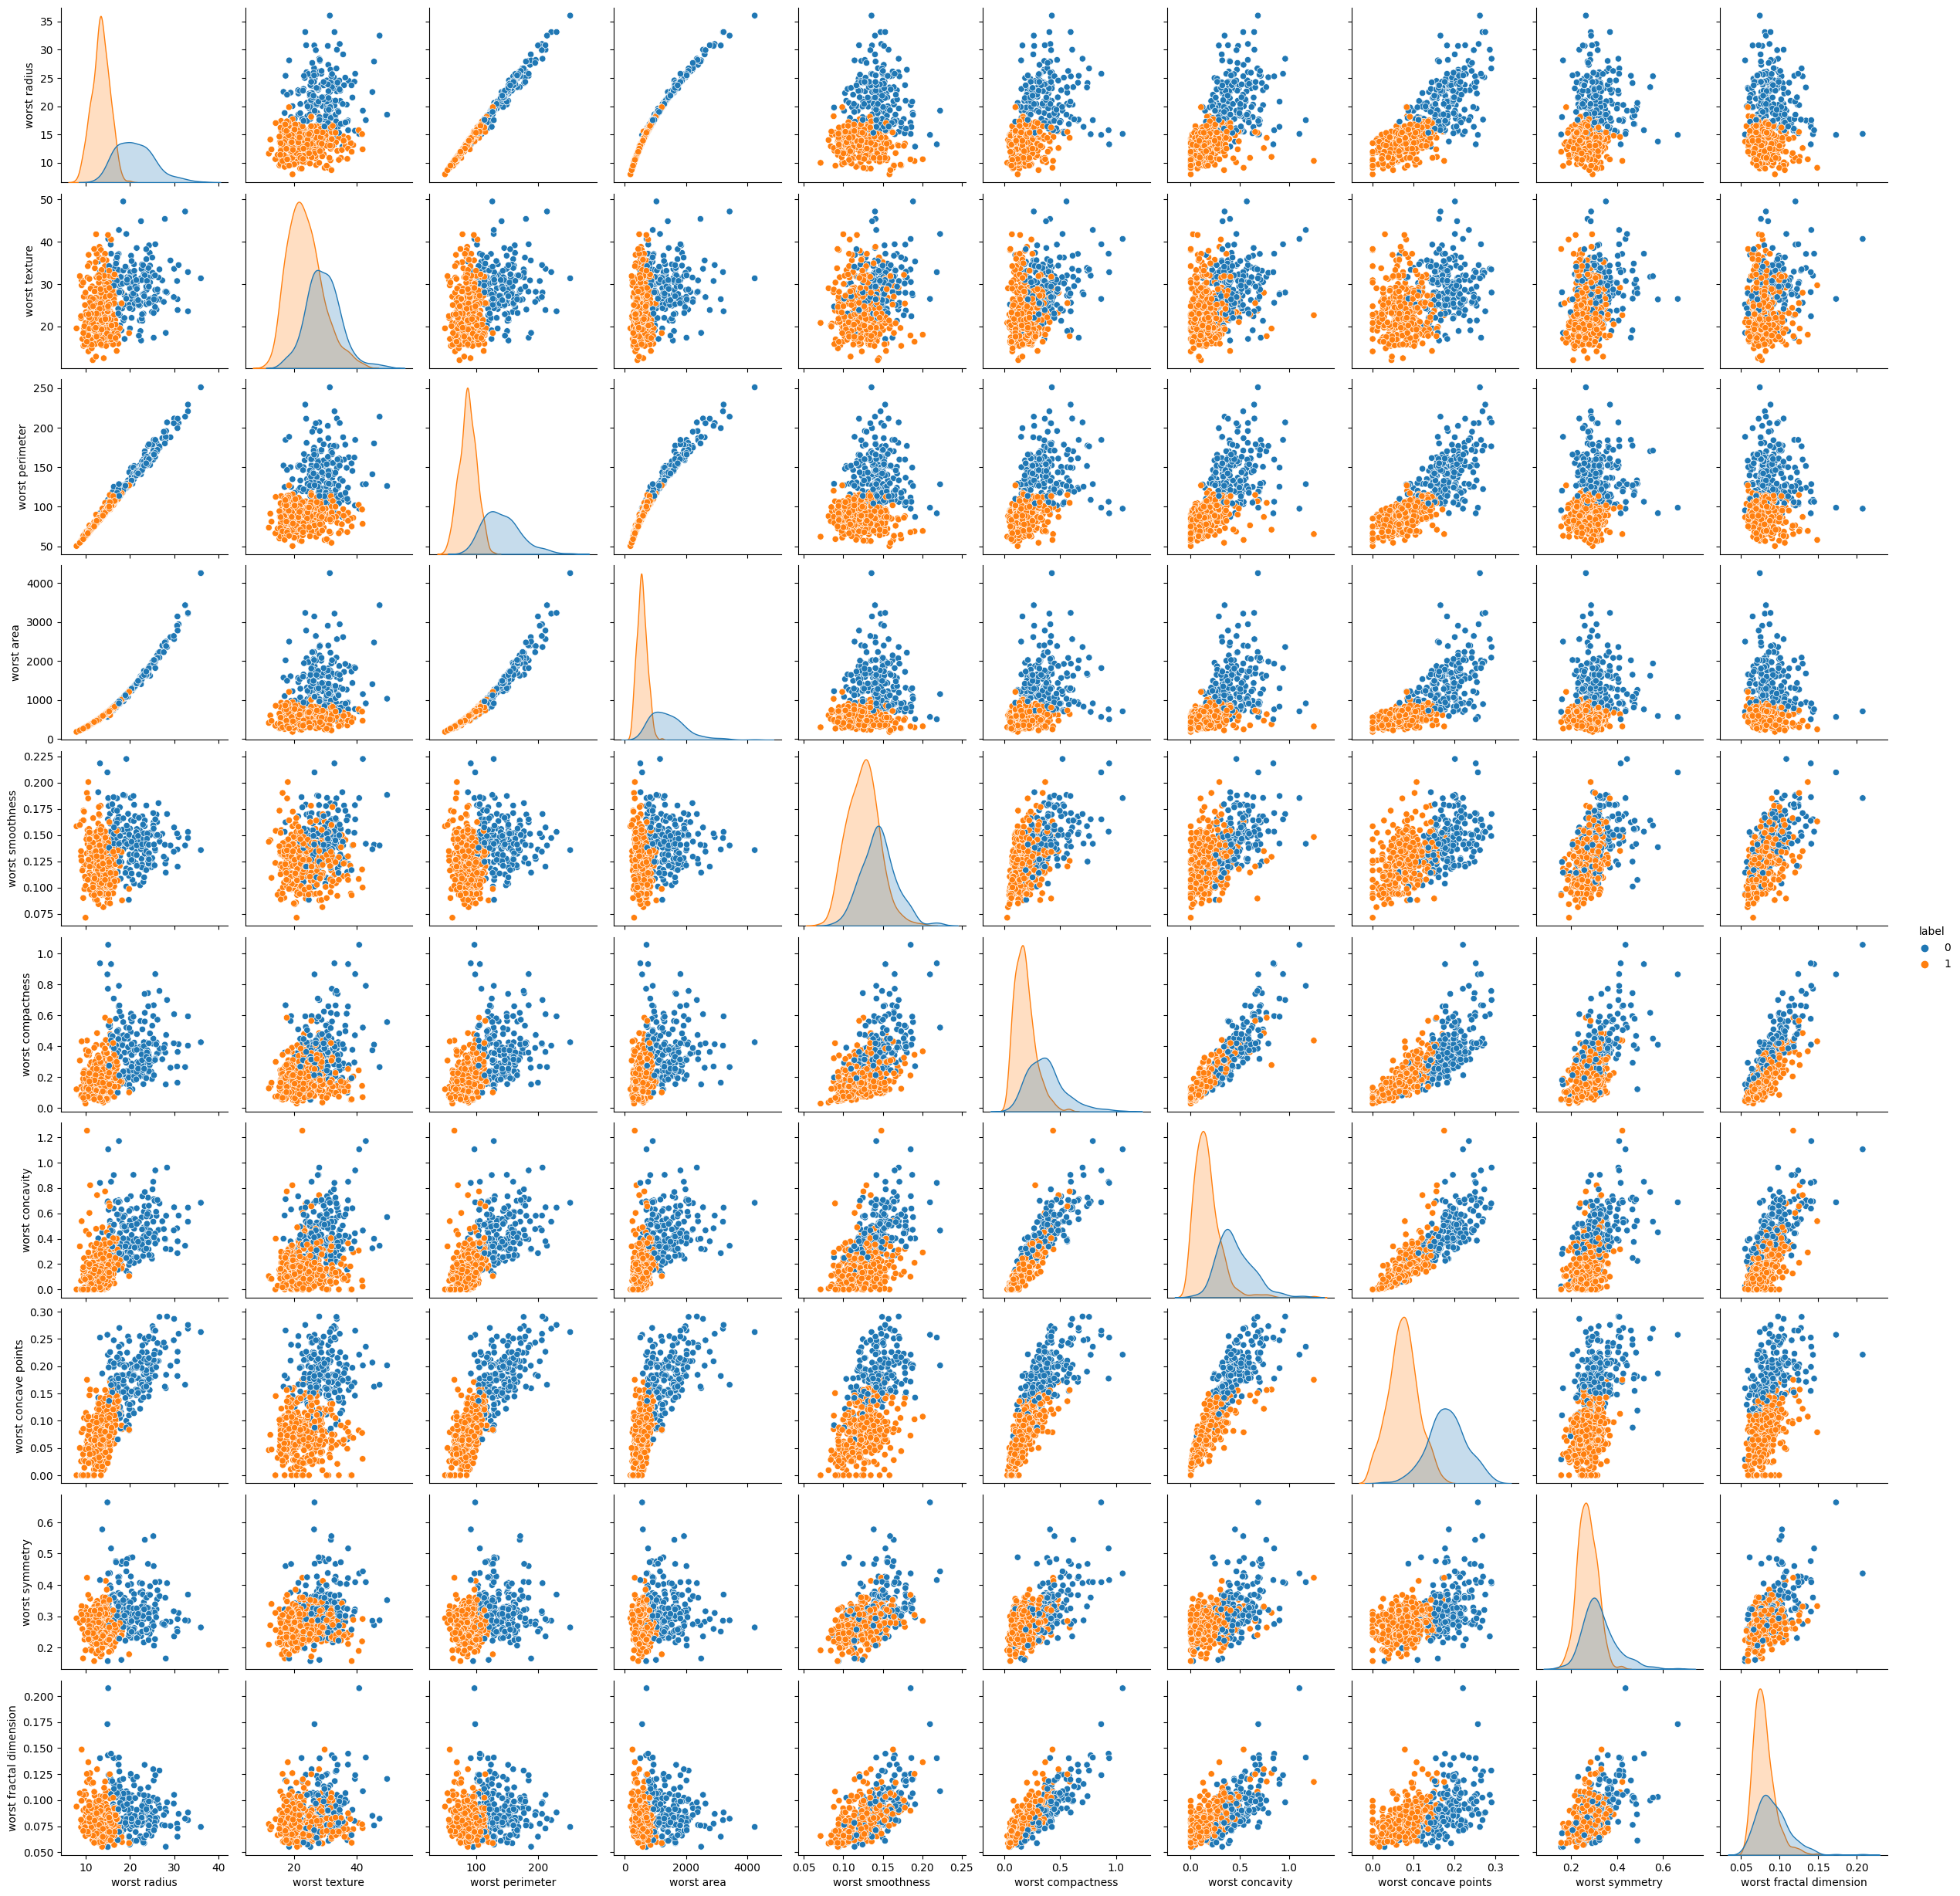

In [16]:

# Creating a pairplot for "WOARST RADIUS" features
sns.pairplot(data, hue='label', vars=["worst radius",
"worst texture",            
"worst perimeter",          
"worst area",                 
"worst smoothness",           
"worst compactness",         
"worst concavity",            
"worst concave points",       
"worst symmetry",           
"worst fractal dimension"])
plt.show()

In [29]:
x = data.drop(columns ='label' , axis=1)
y = data["label"]

In [30]:
# split the data train and text
X_train, X_test, Y_train, Y_test =  train_test_split(x , y, test_size = 0.2 , random_state=2)

In [35]:

#Scaling the data
scaler = StandardScaler()

In [36]:

from sklearn.preprocessing import StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
print( x.shape , X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


In [38]:
# model trainning
model = LogisticRegression()

In [39]:
# train the logistic regression with train data
model.fit(X_train,Y_train)

LogisticRegression()

In [63]:
#train data
x_train_prediction = model.predict(X_train)

In [64]:

train_acc=accuracy_score(Y_train ,x_train_prediction)
recal=recall_score(Y_train ,x_train_prediction)
prec=precision_score(Y_train ,x_train_prediction)
f1=f1_score(Y_train ,x_train_prediction)
print("Training Accuracy :", train_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.989010989010989
F1 Score : 0.991364421416235
Recall : 0.9965277777777778
Precision : 0.9862542955326461


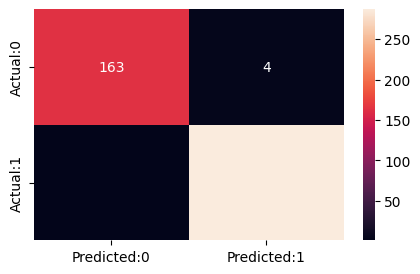

In [70]:

conf_matrix = pd.DataFrame(data = confusion_matrix(Y_train ,x_train_prediction),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [69]:
#test data
x_test_prediction = model.predict(X_test)

In [68]:
test_acc=accuracy_score(Y_test ,x_test_prediction)
recal=recall_score(Y_test ,x_test_prediction)
prec=precision_score(Y_test ,x_test_prediction)
f1=f1_score(Y_test ,x_test_prediction)
print("Training Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9736842105263158
F1 Score : 0.9781021897810219
Recall : 0.9710144927536232
Precision : 0.9852941176470589


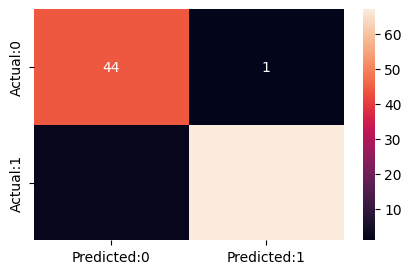

In [71]:

conf_matrix = pd.DataFrame(data = confusion_matrix(Y_test ,x_test_prediction),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [44]:
# building the predictive system

In [45]:
input_data =(13.71	,20.83	,90.2	,577.9	,0.1189	,0.1645,	0.09366,	0.05985,	0.2196	,0.07451	,0.5835	,1.377	,3.856	,50.96,	0.008805,	0.03029	,0.02488,	0.01448	,0.01486	,0.005412,	17.06,	28.14	,110.6	,897	,0.1654,	0.3682,	0.2678	,0.1556,	0.3196,	0.1151)
	
input_data1=(13.54	,14.36	,87.46	,566.3	,0.09779	,0.08129	,0.06664	,0.04781	,0.1885	,0.05766	,0.2699	,0.7886	,2.058	,23.56	,0.008462	,0.0146	,0.02387	,0.01315	,0.0198	,0.0023	,15.11	,19.26	,99.7	,711.2	,0.144	,0.1773	,0.239	,0.1288	,0.2977	,0.07259)
# change the input data as array
input_data_as_numpy_array = np.asarray(input_data1)
reshape_array =input_data_as_numpy_array.reshape(1,-1)
predict = model.predict(reshape_array)

if predict == 0:
    print("m")
else:
    print("b")


m


In [46]:
import pickle

In [47]:
filename= "trained data sav"
pickle.dump(model , open(filename , "wb"))


In [48]:
loaded_model = pickle.load(open("trained data sav" , "rb"))

In [49]:
input_data =(13.71	,20.83	,90.2	,577.9	,0.1189	,0.1645,	0.09366,	0.05985,	0.2196	,0.07451	,0.5835	,1.377	,3.856	,50.96,	0.008805,	0.03029	,0.02488,	0.01448	,0.01486	,0.005412,	17.06,	28.14	,110.6	,897	,0.1654,	0.3682,	0.2678	,0.1556,	0.3196,	0.1151)
	
input_data1=(13.54	,14.36	,87.46	,566.3	,0.09779	,0.08129	,0.06664	,0.04781	,0.1885	,0.05766	,0.2699	,0.7886	,2.058	,23.56	,0.008462	,0.0146	,0.02387	,0.01315	,0.0198	,0.0023	,15.11	,19.26	,99.7	,711.2	,0.144	,0.1773	,0.239	,0.1288	,0.2977	,0.07259)
# change the input data as array
input_data_as_numpy_array = np.asarray(input_data)
reshape_array =input_data_as_numpy_array.reshape(1,-1)
predict = loaded_model.predict(reshape_array)

if predict == 0:
    print("m")
else:
    print("b")



m


In [50]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [51]:
%%writefile my_app.py

import numpy as np
import pickle
import streamlit as st

# Load the trained model
loaded_model = pickle.load(open("trained data sav", "rb"))

# Define the cancer prediction function
def cancer_prediction(input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    reshaped_array = input_data_as_numpy_array.reshape(1, -1)
    prediction = loaded_model.predict(reshaped_array)
    
    if prediction[0] == 0:
        return "malignant"
    else:
        return "brain"

# Apply CSS for background color and styling
st.markdown(
    """
    <style>
    .main {
        background-color: grey
    }
    .stButton>button {
        color: white;
        background-color: #4CAF50;
        border: none;
        padding: 15px 32px;
        text-align: center;
        text-decoration: none;
        display: inline-block;
        font-size: 16px;
        margin: 4px 2px;
        transition-duration: 0.4s;
        cursor: pointer;
    }
    .stButton>button:hover {
        background-color: white;
        color: black;
        border: 2px solid #4CAF50;
    }
    </style>
    """,
    unsafe_allow_html=True
)

# Adding a heading
st.title("Breast Cancer Prediction App")

# Organize input fields into columns
col1, col2, col3 = st.columns(3)

with col1:
    mean_radius = st.number_input("Enter mean radius", min_value=0.0, format="%.2f")
    mean_texture = st.number_input("Enter mean texture", min_value=0.0, format="%.2f")
    mean_perimeter = st.number_input("Enter mean perimeter", min_value=0.0, format="%.2f")
    mean_area = st.number_input("Enter mean area", min_value=0.0, format="%.2f")
    mean_smoothness = st.number_input("Enter mean smoothness", min_value=0.0, format="%.5f")
    mean_compactness = st.number_input("Enter mean compactness", min_value=0.0, format="%.5f")
    mean_concavity = st.number_input("Enter mean concavity", min_value=0.0, format="%.5f")
    mean_concave_points = st.number_input("Enter mean concave points", min_value=0.0, format="%.5f")
    mean_symmetry = st.number_input("Enter mean symmetry", min_value=0.0, format="%.5f")
    mean_fractal_dimension = st.number_input("Enter mean fractal dimension", min_value=0.0, format="%.5f")

with col2:
    radius_error = st.number_input("Enter radius error", min_value=0.0, format="%.5f")
    texture_error = st.number_input("Enter texture error", min_value=0.0, format="%.5f")
    perimeter_error = st.number_input("Enter perimeter error", min_value=0.0, format="%.5f")
    area_error = st.number_input("Enter area error", min_value=0.0, format="%.5f")
    smoothness_error = st.number_input("Enter smoothness error", min_value=0.0, format="%.5f")
    compactness_error = st.number_input("Enter compactness error", min_value=0.0, format="%.5f")
    concavity_error = st.number_input("Enter concavity error", min_value=0.0, format="%.5f")
    concave_points_error = st.number_input("Enter concave points error", min_value=0.0, format="%.5f")
    symmetry_error = st.number_input("Enter symmetry error", min_value=0.0, format="%.5f")
    fractal_dimension_error = st.number_input("Enter fractal dimension error", min_value=0.0, format="%.5f")

with col3:
    worst_radius = st.number_input("Enter worst radius", min_value=0.0, format="%.2f")
    worst_texture = st.number_input("Enter worst texture", min_value=0.0, format="%.2f")
    worst_perimeter = st.number_input("Enter worst perimeter", min_value=0.0, format="%.2f")
    worst_area = st.number_input("Enter worst area", min_value=0.0, format="%.2f")
    worst_smoothness = st.number_input("Enter worst smoothness", min_value=0.0, format="%.5f")
    worst_compactness = st.number_input("Enter worst compactness", min_value=0.0, format="%.5f")
    worst_concavity = st.number_input("Enter worst concavity", min_value=0.0, format="%.5f")
    worst_concave_points = st.number_input("Enter worst concave points", min_value=0.0, format="%.5f")
    worst_symmetry = st.number_input("Enter worst symmetry", min_value=0.0, format="%.5f")
    worst_fractal_dimension = st.number_input("Enter worst fractal dimension", min_value=0.0, format="%.5f")

cancer = ''

# Button for making prediction
if st.button("Cancer Prediction"):
    try:
        # Collect input data for prediction and validate all inputs
        input_data = [
            mean_radius, mean_texture, mean_perimeter, mean_area,
            mean_smoothness, mean_compactness, mean_concavity,
            mean_concave_points, mean_symmetry, mean_fractal_dimension,
            radius_error, texture_error, perimeter_error, area_error,
            smoothness_error, compactness_error, concavity_error,
            concave_points_error, symmetry_error, fractal_dimension_error,
            worst_radius, worst_texture, worst_perimeter, worst_area,
            worst_smoothness, worst_compactness, worst_concavity,
            worst_concave_points, worst_symmetry, worst_fractal_dimension
        ]
        cancer = cancer_prediction(input_data)
        st.success(f"The prediction is: {cancer}")
    except ValueError:
        st.error("Please enter valid numerical values for all fields")


Overwriting my_app.py
